In [44]:
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score

In [45]:
import os
os.getcwd()

'C:\\Users\\dalun\\PycharmProjects\\adversarialTests\\Experiments_Jenuary_2024\\Attack_results\\MLG_Kaggle'

In [46]:
results = pd.read_csv('./Classification_1/_DNN_results.csv')
#results = pd.read_csv('Classification_3results.csv')

results.head()

,y_test,predictions
0,1.0,1.000000
1,0.0,0.000005
2,0.0,0.000014
3,0.0,0.000005
4,0.0,0.000044


In [47]:
f1 = f1_score(results['y_test'].round(), results['predictions'].round())
recall = recall_score(results['y_test'].round(), results['predictions'].round())
precision = precision_score(results['y_test'].round(), results['predictions'].round())
f1, recall, precision

(0.7672131147540984, 0.8602941176470589, 0.6923076923076923)

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score


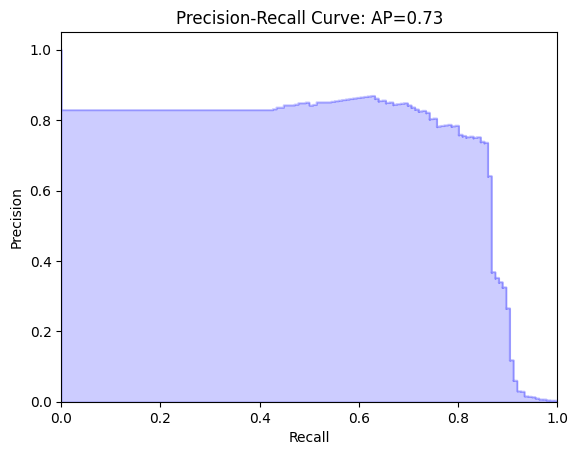

In [49]:
y_test = results['y_test']
y_pred =  results['predictions']

precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Plot the precision-recall curve
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))

plt.show()

## Adversarial attacks

In [50]:
import pickle as pk
import numpy as np


In [110]:
big_dictionary = {}
experiment_folder = 'Experiment_0'

    
eps_0_folder = experiment_folder + '/EPS_0.1'
eps_1_folder = experiment_folder + '/EPS_0.5'


rf_0_folder = eps_0_folder + '/RF'
rf_1_folder = eps_1_folder + '/RF'
nn_0_folder = eps_0_folder + '/DNN'
nn_1_folder = eps_1_folder + '/DNN'

rf_0_folder_r0 = rf_0_folder + '/Run_0'
rf_1_folder_r0 = rf_1_folder + '/Run_1'
nn_0_folder_r0 = nn_0_folder + '/Run_0'
nn_1_folder_r0 = nn_1_folder + '/Run_1'



In [111]:
used_folder = nn_0_folder_r0

with open(used_folder +'/attacks/attack_data.pkl', 'rb') as file:
    attack_data = pk.load(file)

with open(used_folder +'/predictions.npy', 'rb') as file:
    predictions = np.load(file)[:,1]

with open(used_folder +'/attacks/parameters.pkl', 'rb') as file:
    attack_params = pk.load(file)

with open(used_folder +'/attacks/attack_predictions.pkl', 'rb') as file:
    attack_preds = pk.load(file)

with open(used_folder +'/attacks/queries_number.pkl', 'rb') as file:
    queries_number = pk.load(file)

with open(used_folder +'/classifier_name.txt', 'r') as file:
    classifier_name = file.read()
    
with open(used_folder +'/y_test.npy', 'rb') as file:
    y_test = np.load(file)[:,1]

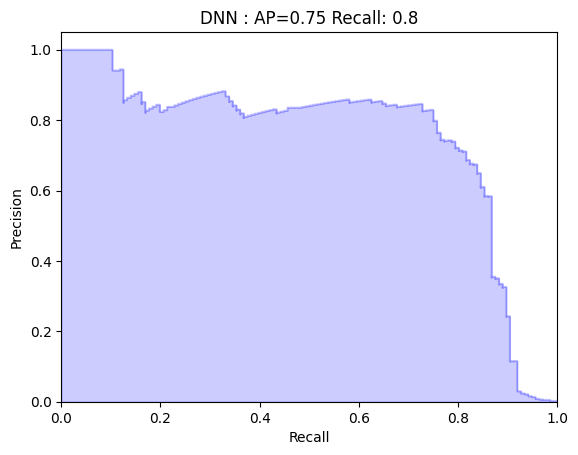

In [112]:
y_pred = predictions
precision1, recall1, threshold1 = precision_recall_curve(y_test, y_pred)
average_precision1 = average_precision_score(y_test, y_pred)

# Plot the precision-recall curve
plt.step(recall1, precision1, color='b', alpha=0.2, where='post')
plt.fill_between(recall1, precision1, step='post', alpha=0.2, color='b')
recall_value = recall_score(y_test, np.round(y_pred))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(str(classifier_name) + ' : AP={0:0.2f}'.format(average_precision1)+' Recall: ' + str(np.round(recall_value, 2)))

plt.show()




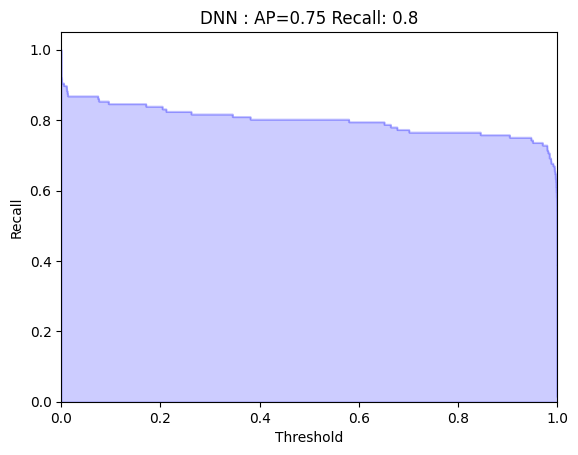

In [113]:
# Plot the threshold-recall curve
plt.step( threshold1 , recall1[:-1], color='b', alpha=0.2, where='post')
plt.fill_between(threshold1 , recall1[:-1], step='post', alpha=0.2, color='b')
recall_value = recall_score(y_test, np.round(y_pred))

plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(str(classifier_name) + ' : AP={0:0.2f}'.format(average_precision1)+' Recall: ' + str(np.round(recall_value, 2)))

plt.show()



In [114]:
prec = precision_score(y_test, np.round(y_pred) )
rec = recall_score(y_test, np.round(y_pred) )
f1 = f1_score(y_test, np.round(y_pred) )
prec, rec, f1

(0.7218543046357616, 0.8014705882352942, 0.759581881533101)

IndexError: index 3 is out of bounds for axis 0 with size 3

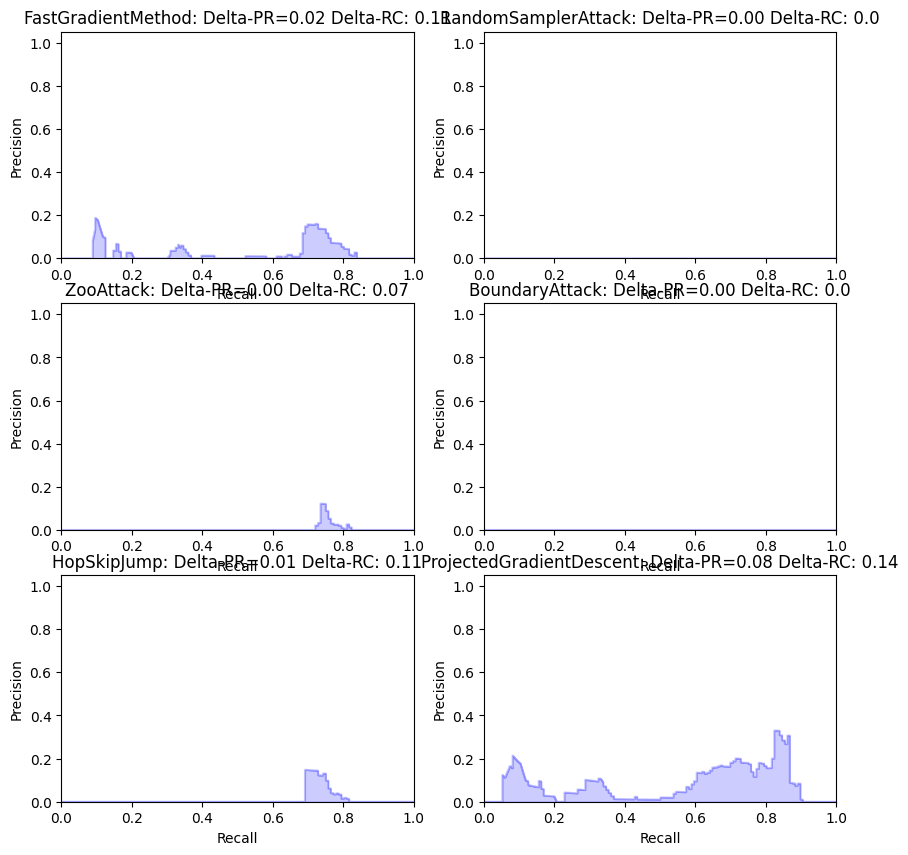

In [115]:
# Initialize subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Iterate over the keys and plot each curve in a subplot
for i, key in enumerate(attack_preds.keys()):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    y_pred = attack_preds[key]
    precision, recall, threshold = precision_recall_curve(y_test, y_pred)
    recall_delta = recall_value - recall_score(y_test, np.round(y_pred))
    average_precision = average_precision_score(y_test, y_pred)
    delta_precision = average_precision1 - average_precision

    interp_recall = np.linspace(0, 1, 1000)
    interp_precision = np.interp(interp_recall, recall[::-1], precision[::-1])
    interp_precision1 = np.interp(interp_recall, recall1[::-1], precision1[::-1])

    # Compute the delta between the precision values
    precision_delta = interp_precision1 - interp_precision

    # Plot the precision-recall curve
    ax.step(interp_recall, precision_delta, color='b', alpha=0.2, where='post')
    ax.fill_between(interp_recall, precision_delta, step='post', alpha=0.2, color='b')

    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_ylim([0.0, 1.05])
    ax.set_xlim([0.0, 1.0])
    ax.set_title(str(key) + ': Delta-PR={0:0.2f}'.format(delta_precision) + ' Delta-RC: ' + str(np.round(recall_delta, 2)))

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
for key in attack_preds.keys():
    y_pred = attack_preds[key]
    precision, recall, threshold = precision_recall_curve(y_test, y_pred)
    recall_delta =  recall_value - recall_score(y_test, np.round(y_pred)) 
    average_precision = average_precision_score(y_test, y_pred)
    delta_precision = average_precision1 - average_precision
    
    interp_recall = np.linspace(0, 1, 1000)
    interp_precision = np.interp(interp_recall, recall[::-1], precision[::-1])
    interp_precision1 = np.interp(interp_recall, recall1[::-1], precision1[::-1])


    
    # Compute the delta between the precision values
    precision_delta = interp_precision1 - interp_precision
    


    # Plot the precision-recall curve
    plt.step(interp_recall, precision_delta, color='b', alpha=0.2, where='post')
    plt.fill_between(interp_recall, precision_delta, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title( str(key) +': Delta precision={0:0.2f}'.format(delta_precision)+' Delta recall: ' + str(np.round(recall_delta, 2)))

    plt.show()

In [116]:
thresholds = np.linspace(0, 1, 100)
recall_genuine = [recall_score(y_test, predictions >= threshold) for threshold in thresholds]
recall_differences = {}
recalls_bad = {}

recalls_bad['Genuine'] = recall_genuine
for key in attack_preds.keys():
    y_pred = attack_preds[key]
    recall_bad = [recall_score(y_test, y_pred >= threshold) for threshold in thresholds]
    recalls_bad[key] = recall_bad
    recall_differences[key] =  np.array(recall_genuine) - np.array(recall_bad)
    # Plot the recall difference



'''
    
    plt.step( threshold , recall_difference, color='b', alpha=0.2, where='post')
    plt.fill_between(threshold , recall_difference, step='post', alpha=0.2, color='b')
    recall_value = recall_score(y_test, np.round(y_pred))
    
    plt.xlabel('Threshold')
    plt.ylabel('Recall')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(str(key) + ' : AP={0:0.2f}'.format(average_precision1)+' Recall: ' + str(np.round(recall_value, 2)))
    plt.show()
'''

"\n    \n    plt.step( threshold , recall_difference, color='b', alpha=0.2, where='post')\n    plt.fill_between(threshold , recall_difference, step='post', alpha=0.2, color='b')\n    recall_value = recall_score(y_test, np.round(y_pred))\n    \n    plt.xlabel('Threshold')\n    plt.ylabel('Recall')\n    plt.ylim([0.0, 1.05])\n    plt.xlim([0.0, 1.0])\n    plt.title(str(key) + ' : AP={0:0.2f}'.format(average_precision1)+' Recall: ' + str(np.round(recall_value, 2)))\n    plt.show()\n"

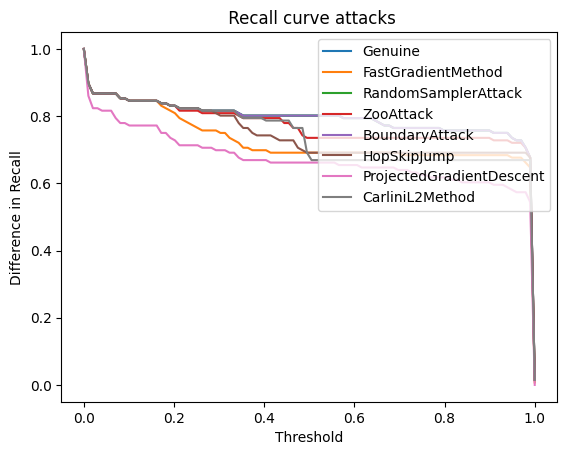

In [117]:
for key, values in recalls_bad.items():
    plt.plot(thresholds, values, label=key)



#plt.plot(thresholds, recall_differences.values, 'b--', label='Recall Difference')
plt.xlabel('Threshold')
plt.ylabel('Difference in Recall')
plt.title( ' Recall curve attacks')
plt.legend(loc='upper right')
#plt.ylim([min(recall_difference) - 0.1, max(recall_difference) + 0.1])
plt.show()


for key in attack_preds.keys():
    y_pred = attack_preds[key]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    recall_delta =  recall_value - recall_score(y_test, np.round(y_pred)) 
    average_precision = average_precision_score(y_test, y_pred)
    delta_precision = average_precision1 - average_precision
    
    interp_recall = np.linspace(0, 1, 100)
    interp_precision = np.interp(interp_recall, recall[::-1], thresholds[::-1])
    interp_precision1 = np.interp(interp_recall, recall1[::-1], thresholds[::-1])


    
    # Compute the delta between the precision values
    precision_delta = interp_precision1 - interp_precision
    


    # Plot the precision-recall curve
    plt.step(interp_recall, precision_delta, color='b', alpha=0.2, where='post')
    plt.fill_between(interp_recall, precision_delta, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title( str(key) +': Delta precision={0:0.2f}'.format(delta_precision)+' Delta recall: ' + str(np.round(recall_delta, 2)))

    plt.show()

In [118]:
queries_number 

{'RandomSamplerAttack': 50025,
 'ZooAttack': 9265000,
 'BoundaryAttack': 10440,
 'HopSkipJump': 53913}

In [119]:
def plot_precision_recall(y_true, predictions, classifier_name):
    return

## EPS Plotting


In [141]:
experiment_folder = 'Experiment_0'
big_dictionary = {}
for index in ['EPS_0.1','EPS_0.25', 'EPS_1', 'EPS_1000']:#   ,,'EPS_0.2', 'EPS_0.3'  , 'EPS_0.15', 'EPS_0.2','EPS_0.3' ,,'EPS_10', 'EPS_1000' 
    big_dictionary[index] = {}
    folder_eps = experiment_folder + '/' + str(index)
    for classifier in ['DNN']: #, 'DNN'
        big_dictionary[index][classifier] ={}
        folder_classifier = folder_eps + '/' + str(classifier)
        for run in [  'Run_0', 'Run_1', 'Run_2' ,  'Run_4']: #, 
            big_dictionary[index][classifier][run] = folder_classifier + '/' + str(run)
#big_dictionary

In [142]:
big_dictionary

{'EPS_0.1': {'DNN': {'Run_0': 'Experiment_0/EPS_0.1/DNN/Run_0',
   'Run_1': 'Experiment_0/EPS_0.1/DNN/Run_1',
   'Run_2': 'Experiment_0/EPS_0.1/DNN/Run_2',
   'Run_4': 'Experiment_0/EPS_0.1/DNN/Run_4'}},
 'EPS_0.25': {'DNN': {'Run_0': 'Experiment_0/EPS_0.25/DNN/Run_0',
   'Run_1': 'Experiment_0/EPS_0.25/DNN/Run_1',
   'Run_2': 'Experiment_0/EPS_0.25/DNN/Run_2',
   'Run_4': 'Experiment_0/EPS_0.25/DNN/Run_4'}},
 'EPS_1': {'DNN': {'Run_0': 'Experiment_0/EPS_1/DNN/Run_0',
   'Run_1': 'Experiment_0/EPS_1/DNN/Run_1',
   'Run_2': 'Experiment_0/EPS_1/DNN/Run_2',
   'Run_4': 'Experiment_0/EPS_1/DNN/Run_4'}},
 'EPS_1000': {'DNN': {'Run_0': 'Experiment_0/EPS_1000/DNN/Run_0',
   'Run_1': 'Experiment_0/EPS_1000/DNN/Run_1',
   'Run_2': 'Experiment_0/EPS_1000/DNN/Run_2',
   'Run_4': 'Experiment_0/EPS_1000/DNN/Run_4'}}}

In [143]:
folder = big_dictionary['EPS_0.1']['DNN']['Run_0']
with open(folder +'/attacks/parameters.pkl', 'rb') as file:
        params = pk.load(file)
params



{'FastGradientMethod': {'eps_step': 0.03333333333333333,
  'targeted': True,
  'batch_size': 32,
  'minimal': True},
 'RandomSamplerAttack': {'targeted': True, 'max_queries': 50000},
 'ZooAttack': {'targeted': True,
  'confidence': 0.01,
  'learning_rate': 0.5,
  'binary_search_steps': 50,
  'initial_const': 0.5,
  'abort_early': False,
  'max_iter': 100,
  'nb_parallel': 8,
  'use_importance': False},
 'BoundaryAttack': {'targeted': True,
  'delta': 0.1,
  'init_size': 20,
  'batch_size': 32,
  'epsilon': 0.01,
  'max_iter': 10,
  'num_trial': 10,
  'sample_size': 5},
 'HopSkipJump': {'max_iter': 15,
  'max_eval': 30,
  'init_eval': 8,
  'init_size': 20,
  'batch_size': 64},
 'ProjectedGradientDescent': {'eps_step': 0.0005,
  'batch_size': 32,
  'verbose': False,
  'targeted': True,
  'max_iter': 2000,
  'num_random_init': 10},
 'CarliniL2Method': {'targeted': True,
  'confidence': 0.01,
  'learning_rate': 0.01,
  'binary_search_steps': 50,
  'initial_const': 1.5,
  'max_iter': 40}}

In [144]:
from collections import Counter



def compute_attacks_delta_recalls(folder):
    delta_recalls_dictionary = {}
    success_rate_dictionary = {}

    with open(folder + '/predictions.npy', 'rb') as file:
        predictions = np.load(file)[:,1]
    with open(folder + '/attacks/attack_predictions.pkl', 'rb') as file:
        attack_preds = pk.load(file)
    with open(folder + '/y_test.npy', 'rb') as file:
        y_test = np.load(file)[:,1]

    total_positives = np.sum(np.round(predictions))
    recall_genuine = recall_score(y_test, np.round(predictions))
    genuine_true_positive = total_positives * recall_genuine
    
    for attack in attack_preds.keys():
        big_pred = np.sort(predictions -  attack_preds[attack])[-50:]
        recall_attack = recall_score(y_test, np.round(attack_preds[attack]))
        delta_recalls_dictionary[attack] =  recall_genuine - recall_attack
        # Calculate success rate of the attack
        true_positive_attack = total_positives * recall_attack
        success_rate_dictionary[attack] = (genuine_true_positive - true_positive_attack) / genuine_true_positive
    return delta_recalls_dictionary, success_rate_dictionary


def create_dataframes_EPS_rec(big_dictionary, metric):
    to_return = {}
    for eps in big_dictionary.keys():
        for classifier in big_dictionary[eps].keys():    
            if classifier not in to_return.keys():
                to_return[classifier] = {}
            metric_dictionary_list = []
            for run in big_dictionary[eps][classifier].keys():
                folder = big_dictionary[eps][classifier][run]
                
                if metric == "Success Rate":
                    _, metric_dictionary = compute_attacks_delta_recalls(folder)
                else:
                    metric_dictionary, _ = compute_attacks_delta_recalls(folder)
                
                metric_dictionary_list.append(metric_dictionary)
                
            sums = Counter()
            counters = Counter()
            for itemset in metric_dictionary_list:
                sums.update(itemset)
                counters.update(itemset.keys())

            ret = {x: float(sums[x])/counters[x] for x in sums.keys()}
            to_return[classifier][eps] = ret
    return to_return
# Now we lose EPS_0.1 We must solve it

eps_material = create_dataframes_EPS_rec(big_dictionary, "Success Rate")
eps_material

{'DNN': {'EPS_0.1': {'FastGradientMethod': 0.13917588851688636,
   'RandomSamplerAttack': 0.0,
   'ZooAttack': 0.09081587587736478,
   'BoundaryAttack': 0.05510383264620554,
   'HopSkipJump': 0.11516143559675909,
   'ProjectedGradientDescent': 0.16355846323834264,
   'CarliniL2Method': 0.14830887471409274},
  'EPS_0.25': {'FastGradientMethod': 0.3798813029076188,
   'RandomSamplerAttack': 0.0,
   'ZooAttack': 0.2733993102414155,
   'BoundaryAttack': 0.3244131599394758,
   'HopSkipJump': 0.32024376695429324,
   'ProjectedGradientDescent': 0.42742437874016825,
   'CarliniL2Method': 0.3011583445793972},
  'EPS_1': {'FastGradientMethod': 0.9332186711840358,
   'RandomSamplerAttack': 0.0,
   'ZooAttack': 0.7356393564053009,
   'BoundaryAttack': 0.8822619904592747,
   'HopSkipJump': 0.7587242018314646,
   'ProjectedGradientDescent': 0.9782950452388963,
   'CarliniL2Method': 0.7059673873070271},
  'EPS_1000': {'FastGradientMethod': 1.0,
   'RandomSamplerAttack': 1.0,
   'ZooAttack': 0.9416927

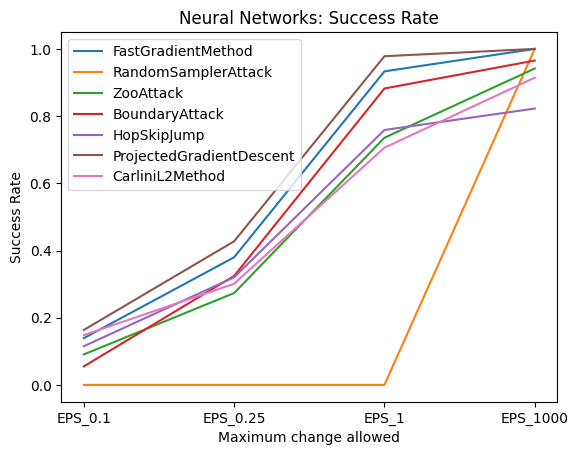

In [153]:
def plot_eps_curve(eps_material, classifier):
    data = eps_material[classifier]
    x_values = list(data.keys())
    for label in data['EPS_0.1'].keys():
        y_values = [data[key][label] for key in data]
        plt.plot(x_values, y_values, label=label)

    plt.xlabel('Maximum change allowed')
    plt.ylabel('Success Rate')
    plt.title('Neural Networks: Success Rate')
    plt.legend()

    plt.show()


plot_eps_curve(eps_material, 'DNN')

## Queries perfomance 

In [146]:
big_dictionary

{'EPS_0.1': {'DNN': {'Run_0': 'Experiment_0/EPS_0.1/DNN/Run_0',
   'Run_1': 'Experiment_0/EPS_0.1/DNN/Run_1',
   'Run_2': 'Experiment_0/EPS_0.1/DNN/Run_2',
   'Run_4': 'Experiment_0/EPS_0.1/DNN/Run_4'}},
 'EPS_0.25': {'DNN': {'Run_0': 'Experiment_0/EPS_0.25/DNN/Run_0',
   'Run_1': 'Experiment_0/EPS_0.25/DNN/Run_1',
   'Run_2': 'Experiment_0/EPS_0.25/DNN/Run_2',
   'Run_4': 'Experiment_0/EPS_0.25/DNN/Run_4'}},
 'EPS_1': {'DNN': {'Run_0': 'Experiment_0/EPS_1/DNN/Run_0',
   'Run_1': 'Experiment_0/EPS_1/DNN/Run_1',
   'Run_2': 'Experiment_0/EPS_1/DNN/Run_2',
   'Run_4': 'Experiment_0/EPS_1/DNN/Run_4'}},
 'EPS_1000': {'DNN': {'Run_0': 'Experiment_0/EPS_1000/DNN/Run_0',
   'Run_1': 'Experiment_0/EPS_1000/DNN/Run_1',
   'Run_2': 'Experiment_0/EPS_1000/DNN/Run_2',
   'Run_4': 'Experiment_0/EPS_1000/DNN/Run_4'}}}

In [147]:
classifier_used = 'DNN'
folder = big_dictionary['EPS_1000'][classifier_used]

delta_recalls = []
queries =  []

for run in folder.keys():
    local_folder = folder[run]
    with open(local_folder +'/predictions.npy', 'rb') as file:
        predictions = np.load(file)[:,1]
    with open(local_folder +'/y_test.npy', 'rb') as file:
        y_test = np.load(file)[:,1]
    with open(local_folder +'/attacks/attack_predictions.pkl', 'rb') as file:
        attack_preds = pk.load(file)
    with open(local_folder +'/attacks/queries_number.pkl', 'rb') as file:
        queries_number = pk.load(file)
        print(queries_number)
    recall = recall_score(y_test, np.round(predictions))
    delta_recall= {}
    for key in attack_preds.keys():
        recall_bad = recall_score(y_test,  np.round(attack_preds[key]))
        delta_recall[key] =  recall - recall_bad

    queries.append(queries_number)
    delta_recalls.append(delta_recall)


delta_recalls
    


{'RandomSamplerAttack': 7134, 'ZooAttack': 10208000, 'BoundaryAttack': 112460, 'HopSkipJump': 48710}
{'RandomSamplerAttack': 6670, 'ZooAttack': 9350000, 'BoundaryAttack': 99359, 'HopSkipJump': 29068}
{'RandomSamplerAttack': 10353, 'ZooAttack': 7326000, 'BoundaryAttack': 67470, 'HopSkipJump': 79101}
{'RandomSamplerAttack': 6670, 'ZooAttack': 1863880, 'BoundaryAttack': 60984, 'HopSkipJump': 76428}


[{'FastGradientMethod': 0.8529411764705882,
  'RandomSamplerAttack': 0.8529411764705882,
  'ZooAttack': 0.7794117647058824,
  'BoundaryAttack': 0.8308823529411764,
  'HopSkipJump': 0.4926470588235294,
  'ProjectedGradientDescent': 0.8529411764705882,
  'CarliniL2Method': 0.7794117647058824},
 {'FastGradientMethod': 0.8088235294117647,
  'RandomSamplerAttack': 0.8088235294117647,
  'ZooAttack': 0.8014705882352942,
  'BoundaryAttack': 0.8088235294117647,
  'HopSkipJump': 0.6397058823529411,
  'ProjectedGradientDescent': 0.8088235294117647,
  'CarliniL2Method': 0.6985294117647058},
 {'FastGradientMethod': 0.8161764705882353,
  'RandomSamplerAttack': 0.8161764705882353,
  'ZooAttack': 0.8161764705882353,
  'BoundaryAttack': 0.8014705882352942,
  'HopSkipJump': 0.8014705882352942,
  'ProjectedGradientDescent': 0.8161764705882353,
  'CarliniL2Method': 0.8161764705882353},
 {'FastGradientMethod': 0.8529411764705882,
  'RandomSamplerAttack': 0.8529411764705882,
  'ZooAttack': 0.735294117647058

In [148]:
queries

[{'RandomSamplerAttack': 7134,
  'ZooAttack': 10208000,
  'BoundaryAttack': 112460,
  'HopSkipJump': 48710},
 {'RandomSamplerAttack': 6670,
  'ZooAttack': 9350000,
  'BoundaryAttack': 99359,
  'HopSkipJump': 29068},
 {'RandomSamplerAttack': 10353,
  'ZooAttack': 7326000,
  'BoundaryAttack': 67470,
  'HopSkipJump': 79101},
 {'RandomSamplerAttack': 6670,
  'ZooAttack': 1863880,
  'BoundaryAttack': 60984,
  'HopSkipJump': 76428}]

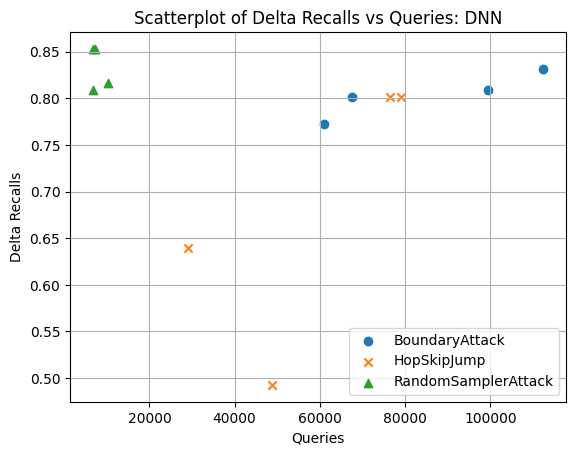

In [154]:
boundary_attack_queries = [item['BoundaryAttack'] for item in queries]
hop_skip_jump_queries = [item['HopSkipJump'] for item in queries]
ZooAttack_attack_queries = [item['ZooAttack'] for item in queries]
Random_attack_queries = [item['RandomSamplerAttack'] for item in queries]


boundary_attack_delta_recalls = [item['BoundaryAttack'] for item in delta_recalls]
hop_skip_jump_delta_recalls = [item['HopSkipJump'] for item in delta_recalls]
ZooAttack_attack_recalls = [item['ZooAttack'] for item in delta_recalls]
Random_attack_recalls = [item['RandomSamplerAttack'] for item in delta_recalls]

# Plot the scatterplot
plt.scatter(boundary_attack_queries, boundary_attack_delta_recalls, label='BoundaryAttack', marker='o')
plt.scatter(hop_skip_jump_queries, hop_skip_jump_delta_recalls, label='HopSkipJump', marker='x')
#plt.scatter(ZooAttack_attack_queries, ZooAttack_attack_recalls, label='ZooAttack', marker='v')
plt.scatter(Random_attack_queries, Random_attack_recalls, label='RandomSamplerAttack', marker='^')


# Add labels and legend
plt.xlabel('Queries')
plt.ylabel('Delta Recalls')
plt.title('Scatterplot of Delta Recalls vs Queries: ' + str(classifier_used))
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
81895 / 121